<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [11]:
library(tidyverse) 
# library(rethinking)

When working with more complex pipes, it’s sometimes useful to call a
function for its side-effects. Maybe you want to print out the current
object, or plot it, or save it to disk. Many times, such functions don’t
return anything, effectively terminating the pipe.

To work around this problem, you can use the “tee” pipe. `%T>%` works like
`%>%` except that it returns the left-hand side instead of the right-hand
side. It’s called “tee” because it’s like a literal T-shaped pipe.


 NULL


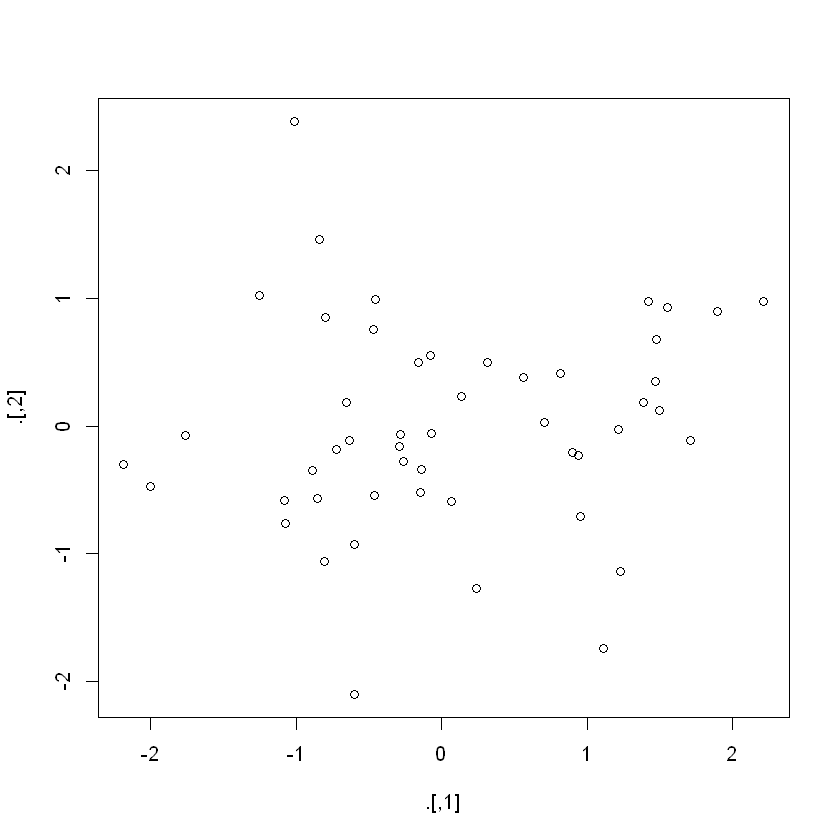

In [14]:
set.seed(5)
rnorm(100) %>%
  matrix(ncol = 2) %>%
  plot() %>%
  str()
#>  NULL

 num [1:50, 1:2] -0.8409 1.3844 -1.2555 0.0701 1.7114 ...


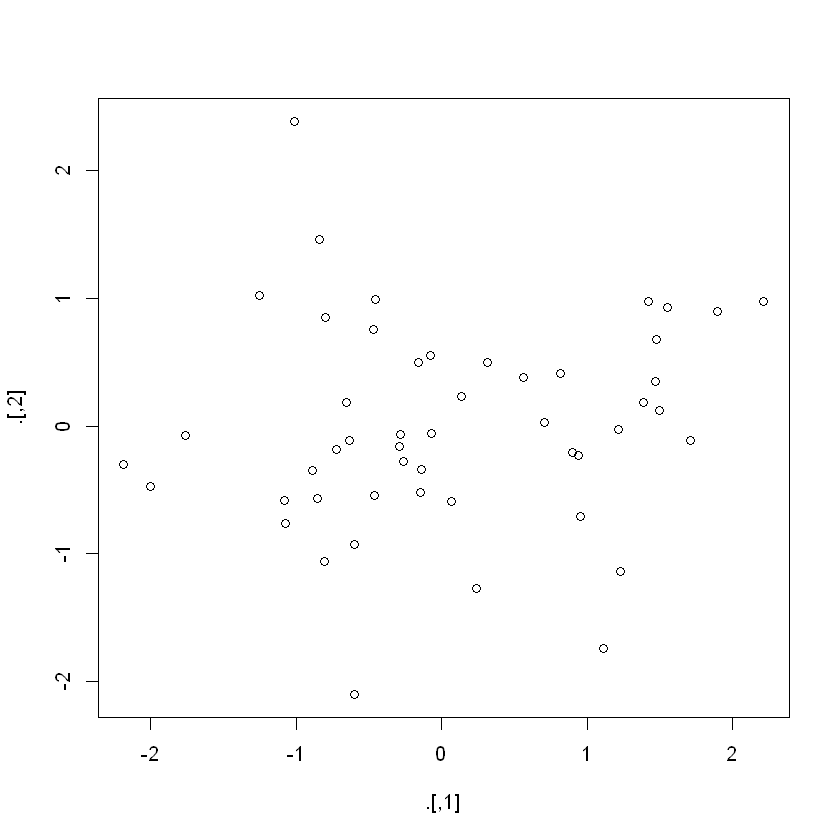

In [15]:
set.seed(5)
rnorm(100) %>%
  matrix(ncol = 2) %T>%
  plot() %>%
  str()
#>  num [1:50, 1:2] -0.387 -0.785 -1.057 -0.796 -1.756 ...

<b><font color = 'purple'>If you’re working with functions that don’t have a data frame based API   </font></b>

(i.e. you pass them individual vectors, not a data frame and expressions
to be evaluated in the context of that data frame), you might find `%$%`
useful. It “explodes” out the variables in a data frame so that you can
refer to them explicitly. This is useful when working with many functions
in base R:

In [19]:
library(magrittr)

In [20]:
mtcars %$%
  cor(disp, mpg)

[1] -0.8475514

In [23]:
cor(mtcars$disp, mtcars$mpg)

[1] -0.8475514

For assignment magrittr provides the `%<>%` operator which allows you to
replace code like:


In [26]:
mtcars <- mtcars %>% 
  transform(cyl = cyl * 2)

with

In [25]:
mtcars %<>% transform(cyl = cyl * 2)

<font color = 'red'>I’m not a fan of this operator because I think assignment is such a special operation that it should always be clear when it’s occurring</font>. In my opinion, a little bit of duplication (i.e. repeating the name of the object twice) is fine in return for making assignment more explicit.

